# Toxic and Abusive Comment Classification using NLP and ML 

## Problem Statement : 
Build a unique model to extract text from images and classify them on the basis of excessive content (Ex: toxic, abusive, hatred, rasist, sexist) 

### Project Overview:
* Using CV2 and Pytesseract to extract Textual information from screenshots
* Using Toxic Comment Classifier [Data](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge) as a training dataset
* Selecting the `severe_toxic` table as the *dependent variable* and `comment_text` as the *independent variable*
* Data Preparation - Handling the slang text and useless characters 
* Processing the data using NLTK 
* Creating a model using Sklearn
* Pickle the model
* Creating a Flask API Endpoint to classify comments using the pretrained model    

In [301]:
# Script checks if the pytesseract is running and correctly installed
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

In [448]:
# Importing the image and extracting textual information 
img = cv2.imread('WhatsApp Image 2020-06-27 at 5.07.05 PM.jpeg')
text = pytesseract.image_to_string(img)
print(text)

Rap video, forced fuck
video, child
sex,bathing video,
fingering video,or
couple sex video is
also avabile in this
which u want msg me
on inbox | will give u at
cheap rate


In [245]:
print(type(text))

<class 'str'>


In [246]:
!ls

Toxic Comment Classification .ipynb
Twitter-Hate-Speech-Detection-master.zip
WhatsApp Image 2020-06-27 at 5.07.05 PM.jpeg
WhatsApp Image 2020-06-28 at 6.49.48 PM.jpeg
train.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df.shape

(159571, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
df.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [9]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [10]:
# In order to use the data for our use case, we just keep the 'severe_toxic' and 'comment_text' tables
df = df.drop(['id', 'toxic', 'obscene', 'threat',
       'insult', 'identity_hate'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_text  159571 non-null  object
 1   severe_toxic  159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [12]:
comment = df['comment_text']
print(comment.head())

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object


### Visualizing the dataset

average length of comment: 394.073


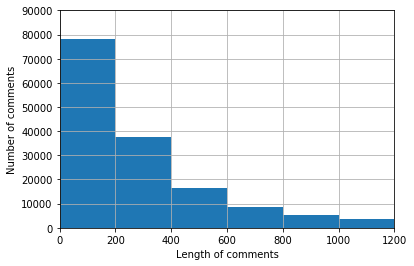

In [13]:
x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

In [14]:
df['comment_text'] = df['comment_text'].astype('str') 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_text  159571 non-null  object
 1   severe_toxic  159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [16]:
# Removing the comments that greater than 400 characters as the mean is weighted around 395 words
data = df[df.comment_text.str.len() < 400]

In [17]:
# The severe_toxic data is very small compared to the entire dataset. Hence we take all the rows with 'severe_toxic' == 1
df1 = data.loc[df['severe_toxic'] == 1]

In [18]:
df1.shape

(1356, 2)

In [19]:
# Grabbing about 2000 rows from the data where 'severe_toxic' != 1
df2 = data.loc[df['severe_toxic'] == 0]

In [20]:
df2 = df2.iloc[:2000,:]

In [21]:
df2.shape

(2000, 2)

In [22]:
# Combining the two dataframes
result_df = pd.concat([df1,df2])

In [23]:
result_df.shape

(3356, 2)

In [24]:
result_df.tail(10)

,comment_text,severe_toxic
2778,Stop crossposting. (robe and wizard hat),0
2779,no fuckin make me fudge packer 'gwernol'[more ...,0
2781,"""\n\nThis article was nominated for deletion o...",0
2782,"Well, we all know where you motives lie now. T...",0
2783,"Question \n\nHello Latics, I noticed that you ...",0
2785,"Another Thank You \nSir, I justed wanted to ex...",0
2786,"@KWW and father F*cker, u still didnt give no ...",0
2787,"Nuremberg Laws\nHi, I noticed that you added a...",0
2788,What was classed as a severe adverse reaction?...,0
2789,"""\n""""Morris engages in five types of distortio...",0


In [25]:
# Shuffling the entire dataframe to confirm the 'severe_toxic' data is spread across the entire dataframe
final_df = result_df.sample(frac=1).reset_index(drop=True)
final_df.shape

(3356, 2)

In [26]:
final_df.head(10)

,comment_text,severe_toxic
0,"""\n\n hi ) \n\n Fuck You Award As you wish. """,1
1,|fukin arseholes dicks cunts die u priks,1
2,"""\n\n Ferrari 312T \n\nSorry Spute. When I saw...",0
3,Wikipedia administrators are defending a mass-...,0
4,"You know what? Don't offend other users , you ...",0
5,Stop talking to me \n\nShut the fuck up you st...,1
6,Nobody cares. Seriously. It's just self-refe...,0
7,fuck all this shit in to dickmania,1
8,==Reference test==\n\n Northern Agricultura...,0
9,What does this Wikiproject years mean? You inv...,0


In [27]:
# Adding some additional rows 
top = pd.DataFrame({'comment_text':['motherfucker dick asshole porn fucked raped'], 'severe_toxic':[1]})
# Concat with old DataFrame and reset the Index.
final_df = pd.concat([top, final_df]).reset_index(drop = True)

In [28]:
final_df.head()

,comment_text,severe_toxic
0,motherfucker dick asshole porn fucked raped,1
1,"""\n\n hi ) \n\n Fuck You Award As you wish. """,1
2,|fukin arseholes dicks cunts die u priks,1
3,"""\n\n Ferrari 312T \n\nSorry Spute. When I saw...",0
4,Wikipedia administrators are defending a mass-...,0


In [29]:
#Removing numbers
final_df['clean_text'] = final_df['comment_text'].apply(lambda x : ' '.join([text for text in x.split() if not text == '\d*']))

In [30]:
# Display all comments in single slot
pd.set_option('display.max_colwidth', -1)
print(final_df.iloc[1,1:])

severe_toxic    1                                   
clean_text      " hi ) Fuck You Award As you wish. "
Name: 1, dtype: object


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [31]:
df3 = final_df.copy()

In [32]:
df3.head()

,comment_text,severe_toxic,clean_text
0,motherfucker dick asshole porn fucked raped,1,motherfucker dick asshole porn fucked raped
1,"""\n\n hi ) \n\n Fuck You Award As you wish. """,1,""" hi ) Fuck You Award As you wish. """
2,|fukin arseholes dicks cunts die u priks,1,|fukin arseholes dicks cunts die u priks
3,"""\n\n Ferrari 312T \n\nSorry Spute. When I saw you hadn't touched the page for nearly an hour, I thought you'd finished editing. If I'd known you were still going, I wouldn't have """"butted in"""". """,0,""" Ferrari 312T Sorry Spute. When I saw you hadn't touched the page for nearly an hour, I thought you'd finished editing. If I'd known you were still going, I wouldn't have """"butted in"""". """
4,Wikipedia administrators are defending a mass-murdering psychopath.,0,Wikipedia administrators are defending a mass-murdering psychopath.


In [33]:
data_1 = df3.iloc[:,2]
data_1.replace("[^a-zA-Z]"," ",regex= True, inplace = True)

In [34]:
y = df3["severe_toxic"]

In [35]:
X = df3.drop('severe_toxic', axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment_text  3357 non-null   object
 1   clean_text    3357 non-null   object
dtypes: object(2)
memory usage: 52.6+ KB


In [36]:
X.head()

,comment_text,clean_text
0,motherfucker dick asshole porn fucked raped,motherfucker dick asshole porn fucked raped
1,"""\n\n hi ) \n\n Fuck You Award As you wish. """,hi Fuck You Award As you wish
2,|fukin arseholes dicks cunts die u priks,fukin arseholes dicks cunts die u priks
3,"""\n\n Ferrari 312T \n\nSorry Spute. When I saw you hadn't touched the page for nearly an hour, I thought you'd finished editing. If I'd known you were still going, I wouldn't have """"butted in"""". """,Ferrari T Sorry Spute When I saw you hadn t touched the page for nearly an hour I thought you d finished editing If I d known you were still going I wouldn t have butted in
4,Wikipedia administrators are defending a mass-murdering psychopath.,Wikipedia administrators are defending a mass murdering psychopath


In [37]:
# new_row = {'comment_text':'rape video forced fucked', 'clean_text':'rape video forced fucked sex fingering couple sex'}
# #append row to the dataframe
# X = X.append(new_row, ignore_index=True)

### Preparing Data - Tokenizing the data

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [39]:
messages = X.copy()

In [40]:
messages.reset_index(inplace=True)

In [41]:
messages.head(10)


,index,comment_text,clean_text
0,0,motherfucker dick asshole porn fucked raped,motherfucker dick asshole porn fucked raped
1,1,"""\n\n hi ) \n\n Fuck You Award As you wish. """,hi Fuck You Award As you wish
2,2,|fukin arseholes dicks cunts die u priks,fukin arseholes dicks cunts die u priks
3,3,"""\n\n Ferrari 312T \n\nSorry Spute. When I saw you hadn't touched the page for nearly an hour, I thought you'd finished editing. If I'd known you were still going, I wouldn't have """"butted in"""". """,Ferrari T Sorry Spute When I saw you hadn t touched the page for nearly an hour I thought you d finished editing If I d known you were still going I wouldn t have butted in
4,4,Wikipedia administrators are defending a mass-murdering psychopath.,Wikipedia administrators are defending a mass murdering psychopath
5,5,"You know what? Don't offend other users , you are a jerk! I know you are correct, but you don't have to get so angry about it. 207.62.246.166",You know what Don t offend other users you are a jerk I know you are correct but you don t have to get so angry about it
6,6,Stop talking to me \n\nShut the fuck up you stupid cunt,Stop talking to me Shut the fuck up you stupid cunt
7,7,Nobody cares. Seriously. It's just self-referential trivia. Guy (),Nobody cares Seriously It s just self referential trivia Guy
8,8,fuck all this shit in to dickmania,fuck all this shit in to dickmania
9,9,==Reference test==\n\n Northern Agricultural Network.http://www.muratshrine.org/bios/burns.php\n\n ==References==,Reference test Northern Agricultural Network http www muratshrine org bios burns php References


In [42]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['clean_text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [43]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [44]:
# Exporting the Countvectorizer using pickle library
import pickle
pickle.dump(cv, open('transform.pkl', 'wb'))

In [45]:
X.shape, y.shape

((3357, 5000), (3357,))

In [46]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [47]:
# Check out the feature_names
cv.get_feature_names()[:20]

['aaron',
 'abc',
 'abl',
 'abl get',
 'absent',
 'absolut',
 'abstract',
 'absurd',
 'abus',
 'abus jerk',
 'abus power',
 'accept',
 'accept apolog',
 'access',
 'access deni',
 'accord',
 'accord criteria',
 'accord rule',
 'accord wikipedia',
 'accordingli']

In [48]:
# Find the hyper parameters used for tokenizing
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [49]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [50]:
count_df.head()

,aaron,abc,abl,abl get,absent,absolut,abstract,absurd,abus,abus jerk,...,youtub com watch,youv,yr,yuen,yuk,yuk yuk,yummi,zapatanca,zealand,zhanzhao
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
import matplotlib.pyplot as plt

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [53]:
# Model Creation
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [54]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.927
Confusion matrix, without normalization


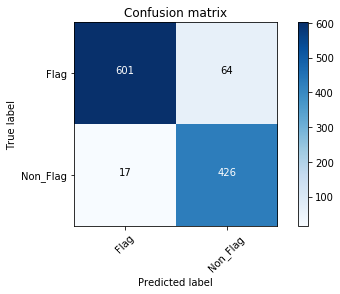

In [55]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Flag', 'Non_Flag'])
plt.grid(False)
plt.savefig('results1.png')

In [56]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9268953068592057

In [446]:
# Dumping the model using pickle library
filename = 'nlp_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [58]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()


# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = nav_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [59]:
result_df

,Classifiers,Crossval Mean Scores
0,Logistic Reg.,0.932853
1,Naives Bayes,0.839033


In [63]:
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_nav = log_reg.predict(X_test)
accuracy_score(y_test, predict_nav)

0.927797833935018

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_nav)

array([[633,  32],
       [ 48, 395]], dtype=int64)

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
predict_grad = grad_clf.predict(X_test)
accuracy_score(y_test, predict_grad)

0.9124548736462094

In [66]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
accuracy_score(y_test, predict)

0.9287003610108303